In [1]:
import pandas as pd


In [32]:
mvps = pd.read_csv('mvps.csv')

In [23]:
# mvps.columns = mvps.columns.str.lower()
mvps.columns = mvps.columns.str.replace(' ', '_').str.lower()

In [25]:
 mvps = mvps[["player", "year", "pts_won", "pts_max", "share"]]


In [33]:
def read_nba_data(mvps):
    mvps = pd.read_csv('mvps.csv')
    
    mvps.columns = mvps.columns.str.replace(' ', '_').str.lower()

    mvps = mvps[["player", "year", "pts_won", "pts_max", "share"]]
    
    mvps['player'] = [i.lower() for i in mvps.player ]
        
    return mvps

In [34]:
read_nba_data(mvps)

,player,year,pts_won,pts_max,share
0,michael jordan,1991,891.0,960,0.928
1,magic johnson,1991,497.0,960,0.518
2,david robinson,1991,476.0,960,0.496
3,charles barkley,1991,222.0,960,0.231
4,karl malone,1991,142.0,960,0.148
...,...,...,...,...,...
466,damian lillard,2021,23.0,1010,0.023
467,nikola jokić,2021,18.0,1010,0.018
468,pascal siakam,2021,17.0,1010,0.017
469,jimmy butler,2021,9.0,1010,0.009


In [26]:
mvps.head()

,player,year,pts_won,pts_max,share
0,Michael Jordan,1991,891.0,960,0.928
1,Magic Johnson,1991,497.0,960,0.518
2,David Robinson,1991,476.0,960,0.496
3,Charles Barkley,1991,222.0,960,0.231
4,Karl Malone,1991,142.0,960,0.148


In [18]:
mvps = mvps[["player", "year", "pts_won", "pts_max", "share"]]

In [73]:
strings = ['player']

for col in strings:
    mvps[col] = mvps[col].str.lower()

C:\Users\ACER-PC\AppData\Local\Temp/ipykernel_2148/74375713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvps[col] = mvps[col].str.lower()


In [28]:
mvps.head()

,player,year,pts_won,pts_max,share
0,michael jordan,1991,891.0,960,0.928
1,magic johnson,1991,497.0,960,0.518
2,david robinson,1991,476.0,960,0.496
3,charles barkley,1991,222.0,960,0.231
4,karl malone,1991,142.0,960,0.148


In [55]:
players = pd.read_csv('csvs/players.csv')

In [56]:
players

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
0,0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,725,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
18040,726,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
18041,727,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18042,728,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [38]:
players.columns = players.columns.str.lower().str.replace(' ', '_')

In [39]:
strings = ['player', 'tm']

for col in strings:
    players[col] = players[col].str.lower()

In [53]:
def read_player_csv(players):

    players = pd.read_csv('csvs/players.csv')

    players.columns = players.columns.str.lower().str.replace(' ', '_')
    players['player'] = players.player.str.replace('*', '', regex=False)
    
    strings = ['player', 'tm']
    for col in strings:
        players[col] = players[col].str.lower()
        
    del players['unnamed:_0']
    del players['rk']
    
    return players

In [54]:
read_player_csv(players)

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year
0,alaa abdelnaby,PF,22,por,43,0,6.7,1.3,2.7,.474,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,mahmoud abdul-rauf,PG,21,den,67,19,22.5,6.2,15.1,.413,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,mark acres,C,28,orl,68,0,19.3,1.6,3.1,.509,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,michael adams,PG,28,den,66,66,35.5,8.5,21.5,.394,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,mark aguirre,SF,31,det,78,13,25.7,5.4,11.7,.462,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,delon wright,PG,28,sac,27,8,25.8,3.9,8.3,.462,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
18040,thaddeus young,PF,32,chi,68,23,24.3,5.4,9.7,.559,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
18041,trae young,PG,22,atl,63,63,33.7,7.7,17.7,.438,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18042,cody zeller,C,28,cho,48,21,20.9,3.8,6.8,.559,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [35]:
del players['unnamed:_0']
del players['rk']

In [40]:
players['player'] = players.player.str.replace('*', '', regex=False)

In [50]:
players.groupby(['player', 'year']).get_group(('greg anderson', 1991))

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year
8,greg anderson,PF,26,tot,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,greg anderson,PF,26,mil,26,0,9.5,1.0,2.8,.370,...,1.0,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991
10,greg anderson,PF,26,njn,1,0,18.0,4.0,4.0,1.000,...,4.0,2.0,6.0,1.0,2.0,0.0,1.0,4.0,8.0,1991
11,greg anderson,PF,26,den,41,2,16.1,2.1,4.7,.440,...,1.6,4.1,5.8,0.3,0.6,0.9,1.5,2.6,5.2,1991


In [50]:
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df['tm'] == 'tot']
        row['tm'] = df.iloc[-1, :]['tm']
        return row
    
players = players.groupby(['player', 'year']).apply(single_row)

In [51]:
players

unnamed:_0   rk          player pos age   tm   g  \
player         year                                                          
a.c. green     1991 164          164  135      a.c. green  PF  27  lal  82   
               1992 633          174  141      a.c. green  PF  28  lal  82   
               1993 1092         157  137      a.c. green  PF  29  lal  82   
               1994 1579         177  149      a.c. green  PF  30  pho  82   
               1995 2067         165  142      a.c. green  SF  31  pho  82   
...                              ...  ...             ...  ..  ..  ...  ..   
željko rebrača 2002 6095         394  336  željko rebrača   C  29  det  74   
               2003 6595         374  316  željko rebrača   C  30  det  30   
               2004 7176         452  338  željko rebrača   C  31  atl  24   
               2005 7776         446  350  željko rebrača   C  32  lac  58   
               2006 8370         433  344  željko rebrača   C  33  lac  29   

                          gs    mp   fg  ...  orb  drb  trb  ast  stl  blk  \
player         year                      ...                                 
a.c. green     1991 164   21  26.4  3.1  ...  2.5  3.8  6.3  0.9  0.7  0.3   
               1992 633   53  35.4  4.7  ...  3.7  5.6  9.3  1.4  1.1  0.4   
               1993 1092  55  34.4  4.6  ...  3.5  5.2  8.7  1.4  1.1  0.5   
               1994 1579  55  34.5  5.7  ...  3.4  5.8  9.2  1.7  0.9  0.5   
               1995 2067  52  32.8  3.8  ...  2.4  5.8  8.2  1.5  0.7  0.4   
...                       ..   ...  ...  ...  ...  ...  ...  ...  ...  ...   
željko rebrača 2002 6095   4  15.9  2.6  ...  1.1  2.8  3.9  0.5  0.4  1.0   
               2003 6595  12  16.3  2.7  ...  0.9  2.2  3.1  0.3  0.2  0.6   
               2004 7176   2  11.4  1.4  ...  1.0  1.5  2.4  0.3  0.2  0.5   
               2005 7776   2  16.0  2.3  ...  0.8  2.3  3.2  0.4  0.2  0.7   
               2006 8370   2  14.2  1.8  ...  0.4  1.8  2.2  0.3  0.2  0.7   

                          tov   pf   pts  year  
player         year                             
a.c. green     1991 164   1.2  1.4   9.1  1991  
               1992 633   1.4  1.7  13.6  1992  
               1993 1092  1.4  1.8  12.8  1993  
               1994 1579  1.2  1.7  14.7  1994  
               1995 2067  1.4  1.8  11.2  1995  
...                       ...  ...   ...   ...  
željko rebrača 2002 6095  1.1  2.6   6.9  2002  
               2003 6595  1.0  2.6   6.6  2003  
               2004 7176  0.7  2.2   3.8  2004  
               2005 7776  0.8  2.2   5.8  2005  
               2006 8370  0.8  2.0   4.7  2006  

[14092 rows x 32 columns]

In [61]:
# drop multiplayer level index
players.index = players.index.droplevel()
players.index = players.index.droplevel()

In [62]:
players

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year
164,a.c. green,PF,27,lal,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
633,a.c. green,PF,28,lal,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1092,a.c. green,PF,29,lal,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1579,a.c. green,PF,30,pho,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
2067,a.c. green,SF,31,pho,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,željko rebrača,C,29,det,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
6595,željko rebrača,C,30,det,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
7176,željko rebrača,C,31,atl,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
7776,željko rebrača,C,32,lac,58,2,16.0,2.3,4.0,.568,...,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


In [63]:
players[players['player'] == 'greg anderson']

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year
8,greg anderson,PF,26,den,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
467,greg anderson,PF,27,den,82,82,34.1,4.7,10.4,.456,...,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5,1992
1412,greg anderson,PF,29,det,77,47,21.1,2.6,4.8,.543,...,2.4,5.0,7.4,0.7,0.7,0.9,1.2,3.0,6.4,1994
1911,greg anderson,PF,30,atl,51,0,12.2,1.1,2.0,.548,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9,1995
2381,greg anderson,PF,31,sas,46,7,7.5,0.5,1.0,.511,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
2948,greg anderson,C,32,sas,82,48,20.2,1.6,3.2,.496,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997
3541,greg anderson,C,33,atl,50,0,8.0,0.7,1.6,.444,...,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1998


In [567]:
mvp_players = players.merge(mvps, how='outer', on=['player', 'year'])

In [258]:
mvp_players[mvp_players['pts_won'] > 0]

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,ast,stl,blk,tov,pf,pts,year,pts_won,pts_max,share
187,al jefferson,C,29,cha,73,73,35.0,9.6,18.8,.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
329,allen iverson,PG,21,phi,76,74,40.1,8.2,19.8,.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
331,allen iverson,SG,23,phi,48,48,41.5,9.1,22.0,.412,...,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270
332,allen iverson,SG,24,phi,70,70,40.8,10.4,24.8,.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
333,allen iverson,SG,25,phi,71,71,42.0,10.7,25.5,.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,vince carter,SF,23,tor,82,82,38.1,9.6,20.7,.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
13588,vince carter,SF,24,tor,75,75,39.7,10.2,22.1,.460,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
13592,vince carter,SF-SG,28,njn,77,76,36.7,9.0,20.0,.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
13952,yao ming,C,23,hou,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


In [82]:
mvp_players

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,ast,stl,blk,tov,pf,pts,year,pts_won,pts_max,share
0,a.c. green,PF,27,lal,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,NaN,NaN,NaN
1,a.c. green,PF,28,lal,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN
2,a.c. green,PF,29,lal,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN
3,a.c. green,PF,30,pho,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN
4,a.c. green,SF,31,pho,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,željko rebrača,C,29,det,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,NaN,NaN,NaN
14088,željko rebrača,C,30,det,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,NaN,NaN,NaN
14089,željko rebrača,C,31,atl,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,NaN,NaN,NaN
14090,željko rebrača,C,32,lac,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,NaN,NaN,NaN


In [568]:
mvp_players[['pts_won', 'pts_max', 'share']] = mvp_players[['pts_won', 'pts_max', 'share']].fillna(0)

In [85]:
mvp_players

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,ast,stl,blk,tov,pf,pts,year,pts_won,pts_max,share
0,a.c. green,PF,27,lal,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0
1,a.c. green,PF,28,lal,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
2,a.c. green,PF,29,lal,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
3,a.c. green,PF,30,pho,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
4,a.c. green,SF,31,pho,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,željko rebrača,C,29,det,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
14088,željko rebrača,C,30,det,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
14089,željko rebrača,C,31,atl,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
14090,željko rebrača,C,32,lac,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


In [692]:
#  TEAMS
teams = pd.read_csv('teams.csv')


In [ ]:
def read_team_csv(teams):
    teams.columns = teams.columns.str.lower().str.replace(' ', '')
    teams.team = [i for i in teams['team'].str.lower()]    
    del teams['unnamed:0']
    teams = teams[~teams['w'].str.contains('Division')]
    teams['team'] = teams['team'].str.replace('*', '', regex=False)
    return teams

In [693]:
teams.columns = teams.columns.str.lower().str.replace(' ', '')

In [694]:
teams.team = [i for i in teams['team'].str.lower()]

In [695]:
teams.head(16)

,unnamed:0,w,l,w/l%,gb,ps/g,pa/g,srs,year,team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,boston celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,new york knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,washington bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,new jersey nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,miami heat
6,6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,central division
7,7,61,21,.744,—,110.0,101.0,8.57,1991,chicago bulls*
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,detroit pistons*
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,milwaukee bucks*


In [696]:
del teams['unnamed:0']

In [697]:
teams = teams[~teams['w'].str.contains('Division')]

In [698]:
teams.team = teams['team'].str.replace('*', '', regex=False)

In [114]:
teams.head()

,w,l,w/l%,gb,ps/g,pa/g,srs,year,team
0,56,26,.683,—,111.5,105.7,5.22,1991,boston celtics
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,philadelphia 76ers
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,new york knicks
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,washington bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,new jersey nets


In [148]:
col = ['abbre', 'name']

In [163]:
strings = ['abbre', 'name']

for col in strings:
    nickname[col] = nickname[col].str.lower().str.replace('-', '')

In [569]:
nicknames = {}

with open("nicknames.txt", 'r') as f_in:
    lines = f_in.readlines()
    for line in lines[1:]:
        abbrev, name = line.replace('\n', '').replace('-', '').replace("'", '"').replace('\t', ':').split(':')
        nicknames[abbrev] = name
        for key, val in nicknames.items():
            names = key.strip()
            nickname[names] = val

In [527]:
nicknames

{'ATL': ' Atlanta Hawks',
 'BOS': ' Boston Celtics',
 'CHA': ' Charlotte Hornets',
 'CHI': ' Chicago Bulls',
 'CLE': ' Cleveland Cavaliers',
 'DAL': ' Dallas Mavericks',
 'DEN': ' Denver Nuggets',
 'DET': ' Detroit Pistons',
 'GSW': ' Golden State Warriors',
 'HOU ': 'Houston Rockets',
 'IND': ' Indiana Pacers',
 'LAC ': 'Los Angeles Clippers',
 'LAL': ' Los Angeles Lakers',
 'MEM': ' Memphis Grizzlies',
 'MIA': ' Miami Heat',
 'MIL': ' Milwaukee Bucks',
 'MIN': ' Minnesota Timberwolves',
 'NOH': ' New Orleans Hurricanes',
 'NYK': ' New York Knicks',
 'BKN': ' Brooklyn Nets',
 'OKC': ' Oklahoma City Thunder',
 'ORL': ' Orlando Magic',
 'PHI': ' Philadelphia 76ers',
 'PHO': ' Phoenix Suns',
 'POR': ' Portland Trail Blazers',
 'SAC': ' Sacramento Kings',
 'TOR': ' Toronto Raptors',
 'UTH': ' Utah Jazz',
 'WAS': ' Washington Wizards',
 'WSB': ' "Washington Bullets Roster',
 'HOU': '"Houston Rockets',
 'CHO': ' Charlotte Hornets',
 'UTA': 'Utah Jazz',
 'VAN': ' "Vancouver Grizzlies',
 'SEA

In [570]:
nickname = {}

for key, val in nicknames.items():
    name = key.strip().lower()
    nickname[name] = val.strip().replace('"', '').lower()

In [571]:
nickname

{'atl': 'atlanta hawks',
 'bos': 'boston celtics',
 'cha': 'charlotte hornets',
 'chi': 'chicago bulls',
 'cle': 'cleveland cavaliers',
 'dal': 'dallas mavericks',
 'den': 'denver nuggets',
 'det': 'detroit pistons',
 'gsw': 'golden state warriors',
 'hou': 'houston rockets',
 'ind': 'indiana pacers',
 'lac': 'los angeles clippers',
 'lal': 'los angeles lakers',
 'mem': 'memphis grizzlies',
 'mia': 'miami heat',
 'mil': 'milwaukee bucks',
 'min': 'minnesota timberwolves',
 'noh': 'new orleans hurricanes',
 'nyk': 'new york knicks',
 'bkn': 'brooklyn nets',
 'okc': 'oklahoma city thunder',
 'orl': 'orlando magic',
 'phi': 'philadelphia 76ers',
 'pho': 'phoenix suns',
 'por': 'portland trail blazers',
 'sac': 'sacramento kings',
 'tor': 'toronto raptors',
 'uth': 'utah jazz',
 'was': 'washington wizards',
 'wsb': 'washington bullets roster',
 'cho': 'charlotte hornets',
 'uta': 'utah jazz',
 'van': 'vancouver grizzlies',
 'sea': 'seattle storm',
 'njn': 'new jersey nets',
 'no': 'new orl

In [530]:
mvp_players.head()

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,ast,stl,blk,tov,pf,pts,year,pts_won,pts_max,share
0,a.c. green,PF,27,lal,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0
1,a.c. green,PF,28,lal,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
2,a.c. green,PF,29,lal,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
3,a.c. green,PF,30,pho,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
4,a.c. green,SF,31,pho,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0


In [572]:
mvp_players['pos'] = mvp_players['pos'].str.lower()

In [573]:
mvp_players['team'] = mvp_players['tm'].map(nickname)

In [574]:
mvp_players.tail()

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,stl,blk,tov,pf,pts,year,pts_won,pts_max,share,team
14087,željko rebrača,c,29,det,74,4,15.9,2.6,5.1,.505,...,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0,detroit pistons
14088,željko rebrača,c,30,det,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0,detroit pistons
14089,željko rebrača,c,31,atl,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0,atlanta hawks
14090,željko rebrača,c,32,lac,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0,los angeles clippers
14091,željko rebrača,c,33,lac,29,2,14.2,1.8,3.3,.542,...,0.2,0.7,0.8,2.0,4.7,2006,0.0,0.0,0.0,los angeles clippers


In [427]:
teams.head(2)

,w,l,w/l%,gb,ps/g,pa/g,srs,year,team
0,56,26,.683,—,111.5,105.7,5.22,1991,boston celtics
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,philadelphia 76ers


In [428]:
mvp_players.rename(columns={'teams': 'team'}, inplace=True)

In [416]:
list(teams['team'].unique())

['boston celtics',
 'philadelphia 76ers',
 'new york knicks',
 'washington bullets',
 'new jersey nets',
 'miami heat',
 'chicago bulls',
 'detroit pistons',
 'milwaukee bucks',
 'atlanta hawks',
 'indiana pacers',
 'cleveland cavaliers',
 'charlotte hornets',
 'san antonio spurs',
 'utah jazz',
 'houston rockets',
 'orlando magic',
 'minnesota timberwolves',
 'dallas mavericks',
 'denver nuggets',
 'portland trail blazers',
 'los angeles lakers',
 'phoenix suns',
 'golden state warriors',
 'seattle supersonics',
 'los angeles clippers',
 'sacramento kings',
 'toronto raptors',
 'vancouver grizzlies',
 'washington wizards',
 'memphis grizzlies',
 'new orleans hornets',
 'charlotte bobcats',
 'new orleans/oklahoma city hornets',
 'oklahoma city thunder',
 'brooklyn nets',
 'new orleans pelicans']

In [515]:
# mvp_players['teams'] = [i for i in mvp_players['teams'].str.strip().str.replace('"', '')]
list(mvp_players['team'].unique())

['los angeles lakers',
 'phoenix suns',
 'dallas mavericks',
 'miami heat',
 'cleveland cavaliers',
 'washington bullets roster',
 'chicago bulls',
 'golden state warriors',
 'indiana pacers',
 'washington wizards',
 'minnesota timberwolves',
 'boston celtics',
 'houston rockets',
 'denver nuggets',
 'orlando magic',
 'new orleans hurricanes',
 'toronto raptors',
 'sacramento kings',
 'charlotte hornets',
 'portland trail blazers',
 'detroit pistons',
 'philadelphia 76ers',
 'utah jazz',
 'milwaukee bucks',
 'vancouver grizzlies',
 'seattle storm',
 'new jersey nets',
 'new oklahoma city',
 'los angeles clippers',
 'oklahoma city thunder',
 'atlanta hawks',
 'memphis grizzlies',
 'new york knicks',
 'new orleans pelicans',
 'brooklyn nets',
 'san antonio spurs']

In [622]:
for index, row in teams.iterrows():
    if row['team'] == 'seattle supersonics':
        teams.at[index, 'team'] = 'seattle storm'
    elif row['team'] == 'new orleans hornets':
        teams.at[index, 'team'] = 'new orleans pelicans'
    elif row['team'] == 'charlotte bobcats':
        teams.at[index, 'team'] = 'charlotte hornets'
        

In [728]:
# for index, row in mvp_players.iterrows():
#     if row['tm'] == 'wsb':
#         mvp_players.at[index, 'team'] = 'washington bullets'

for index, row in teams.iterrows():
    if row['team'] == 'new orleans hornets':
        teams.at[index, 'team'] = 'new orleans pelicans'
    

In [777]:
stat = mvp_players.merge(teams, how='outer', on=['team', 'year'])

In [785]:
stat.dropna(axis=0, subset=['player', 'pos', 'age'], inplace=True)

In [788]:
stat

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,pts_max,share,team,w,l,w/l%,gb,ps/g,pa/g,srs
0,a.c. green,pf,27,lal,82,21,26.4,3.1,6.6,.476,...,0.0,0.0,los angeles lakers,58,24,.707,5.0,106.3,99.6,6.73
1,byron scott,sg,29,lal,82,82,32.1,6.1,12.8,.477,...,0.0,0.0,los angeles lakers,58,24,.707,5.0,106.3,99.6,6.73
2,elden campbell,pf,22,lal,52,0,7.3,1.1,2.4,.455,...,0.0,0.0,los angeles lakers,58,24,.707,5.0,106.3,99.6,6.73
3,irving thomas,pf,25,lal,26,0,4.2,0.7,1.9,.340,...,0.0,0.0,los angeles lakers,58,24,.707,5.0,106.3,99.6,6.73
4,james worthy,sf,29,lal,78,74,38.6,9.2,18.7,.492,...,0.0,0.0,los angeles lakers,58,24,.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,spencer hawes,pf,28,mil,54,1,14.8,2.5,5.1,.484,...,0.0,0.0,milwaukee bucks,42,40,.512,9.0,103.6,103.8,-0.45
14088,steve novak,pf,33,mil,8,0,2.8,0.3,0.9,.286,...,0.0,0.0,milwaukee bucks,42,40,.512,9.0,103.6,103.8,-0.45
14089,terrence jones,pf,25,mil,54,12,23.5,4.3,9.1,.470,...,0.0,0.0,milwaukee bucks,42,40,.512,9.0,103.6,103.8,-0.45
14090,thon maker,c,19,mil,57,34,9.9,1.5,3.2,.459,...,0.0,0.0,milwaukee bucks,42,40,.512,9.0,103.6,103.8,-0.45


In [791]:
len(mvp_players['team'].unique())

36

In [793]:
stat.dtypes

player      object
pos         object
age         object
tm          object
g           object
gs          object
mp          object
fg          object
fga         object
fg%         object
3p          object
3pa         object
3p%         object
2p          object
2pa         object
2p%         object
efg%        object
ft          object
fta         object
ft%         object
orb         object
drb         object
trb         object
ast         object
stl         object
blk         object
tov         object
pf          object
pts         object
year         int64
pts_won    float64
pts_max    float64
share      float64
team        object
w           object
l           object
w/l%        object
gb          object
ps/g        object
pa/g        object
srs         object
dtype: object

In [867]:
stats = stat.apply(pd.to_numeric, errors='ignore')

In [872]:
stats.dtypes

player      object
pos         object
age          int64
tm          object
g            int64
gs           int64
mp         float64
fg         float64
fga        float64
fg%        float64
3p         float64
3pa        float64
3p%        float64
2p         float64
2pa        float64
2p%        float64
efg%       float64
ft         float64
fta        float64
ft%        float64
orb        float64
drb        float64
trb        float64
ast        float64
stl        float64
blk        float64
tov        float64
pf         float64
pts        float64
year         int64
pts_won    float64
pts_max    float64
share      float64
team        object
w          float64
l          float64
w/l%       float64
gb          object
ps/g       float64
pa/g       float64
srs        float64
dtype: object

In [874]:
list(stats['gb'].unique())

['5.0',
 '14.0',
 '23.0',
 '7.0',
 0,
 '40.0',
 '42.0',
 '18.0',
 '6.0',
 '24.0',
 '26.0',
 '37.0',
 '29.0',
 '21.0',
 '28.0',
 '25.0',
 '8.0',
 '19.0',
 '1.0',
 '17.0',
 '13.0',
 '3.0',
 '15.0',
 '9.0',
 '2.0',
 '35.0',
 '20.0',
 '11.0',
 '16.0',
 '41.0',
 '12.0',
 '50.0',
 '30.0',
 '34.0',
 '4.0',
 '1.5',
 '22.0',
 '51.0',
 '36.0',
 '43.0',
 '39.0',
 '48.0',
 '46.0',
 '10.0',
 '10.5',
 '32.0',
 '38.0',
 '27.0',
 '33.0',
 '21.5',
 '45.0',
 '31.0',
 '22.5',
 '25.5',
 '3.5',
 '20.5',
 '11.5',
 '52.0',
 '2.5',
 '18.5',
 '44.0',
 '12.5',
 '47.0',
 '32.5',
 '56.0',
 '4.5']

In [877]:
stats['gb'] = stats['gb'].apply(pd.to_numeric, errors='ignore')

In [873]:
stats['gb'] = stats['gb'].replace('—', 0)

In [880]:
stats.to_csv('player_mvp_stats.csv')

In [888]:
highest_score = stats[stats['g'] > 70].sort_values('pts', ascending=False).head(10)

<AxesSubplot:xlabel='player'>

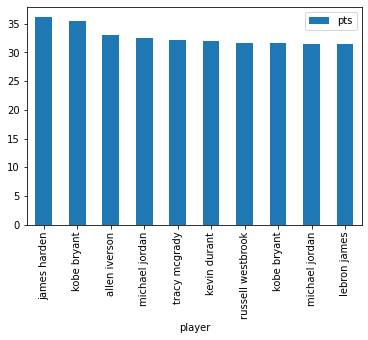

In [890]:
highest_score.plot.bar('player', 'pts')

In [906]:
stats.groupby('year').apply(lambda x: x.sort_values('pts', ascending=False).head(1))

,,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,pts_max,share,team,w,l,w/l%,gb,ps/g,pa/g,srs
year,,,,,,,,,,,,,,,,,,,,,,
1991,9805,michael jordan,sg,27,chi,82,82,37.0,12.1,22.4,0.539,...,960.0,0.928,chicago bulls,61.0,21.0,0.744,0.0,110.0,101.0,8.57
1992,9818,michael jordan,sg,28,chi,80,80,38.8,11.8,22.7,0.519,...,960.0,0.938,chicago bulls,67.0,15.0,0.817,0.0,109.9,99.5,10.07
1993,9831,michael jordan,sg,29,chi,78,78,39.3,12.7,25.7,0.495,...,980.0,0.577,chicago bulls,57.0,25.0,0.695,0.0,105.2,98.9,6.19
1994,8486,david robinson,c,28,sas,80,80,40.5,10.5,20.7,0.507,...,1010.0,0.723,san antonio spurs,55.0,27.0,0.671,3.0,100.0,94.8,5.05
1995,7220,shaquille o'neal,c,22,orl,79,79,37.0,11.8,20.2,0.583,...,1050.0,0.576,orlando magic,57.0,25.0,0.695,0.0,110.9,103.8,6.44
1996,10403,michael jordan,sg,32,chi,82,82,37.7,11.2,22.6,0.495,...,1130.0,0.986,chicago bulls,72.0,10.0,0.878,0.0,105.2,92.9,11.80
1997,10417,michael jordan,sg,33,chi,82,82,37.9,11.2,23.1,0.486,...,1150.0,0.832,chicago bulls,69.0,13.0,0.841,0.0,103.1,92.3,10.70
1998,10431,michael jordan,sg,34,chi,82,82,38.8,10.7,23.1,0.465,...,1160.0,0.934,chicago bulls,62.0,20.0,0.756,0.0,96.7,89.6,7.24
1999,924,allen iverson,sg,23,phi,48,48,41.5,9.1,22.0,0.412,...,1180.0,0.270,philadelphia 76ers,28.0,22.0,0.560,5.0,89.7,87.6,2.56


In [913]:
stats.groupby('year').apply(lambda x: x.sort_values('pts', ascending=False).iloc[0])

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,pts_max,share,team,w,l,w/l%,gb,ps/g,pa/g,srs
year,,,,,,,,,,,,,,,,,,,,,
1991,michael jordan,sg,27,chi,82,82,37.0,12.1,22.4,0.539,...,960.0,0.928,chicago bulls,61.0,21.0,0.744,0.0,110.0,101.0,8.57
1992,michael jordan,sg,28,chi,80,80,38.8,11.8,22.7,0.519,...,960.0,0.938,chicago bulls,67.0,15.0,0.817,0.0,109.9,99.5,10.07
1993,michael jordan,sg,29,chi,78,78,39.3,12.7,25.7,0.495,...,980.0,0.577,chicago bulls,57.0,25.0,0.695,0.0,105.2,98.9,6.19
1994,david robinson,c,28,sas,80,80,40.5,10.5,20.7,0.507,...,1010.0,0.723,san antonio spurs,55.0,27.0,0.671,3.0,100.0,94.8,5.05
1995,shaquille o'neal,c,22,orl,79,79,37.0,11.8,20.2,0.583,...,1050.0,0.576,orlando magic,57.0,25.0,0.695,0.0,110.9,103.8,6.44
1996,michael jordan,sg,32,chi,82,82,37.7,11.2,22.6,0.495,...,1130.0,0.986,chicago bulls,72.0,10.0,0.878,0.0,105.2,92.9,11.80
1997,michael jordan,sg,33,chi,82,82,37.9,11.2,23.1,0.486,...,1150.0,0.832,chicago bulls,69.0,13.0,0.841,0.0,103.1,92.3,10.70
1998,michael jordan,sg,34,chi,82,82,38.8,10.7,23.1,0.465,...,1160.0,0.934,chicago bulls,62.0,20.0,0.756,0.0,96.7,89.6,7.24
1999,allen iverson,sg,23,phi,48,48,41.5,9.1,22.0,0.412,...,1180.0,0.270,philadelphia 76ers,28.0,22.0,0.560,5.0,89.7,87.6,2.56


In [914]:
stats.corr()['share']

age        0.019847
g          0.089217
gs         0.166060
mp         0.160894
fg         0.273037
fga        0.246887
fg%        0.064178
3p         0.090068
3pa        0.090612
3p%        0.010556
2p         0.274176
2pa        0.251479
2p%        0.060394
efg%       0.056666
ft         0.314328
fta        0.320615
ft%        0.035331
orb        0.102101
drb        0.210804
trb        0.184752
ast        0.191614
stl        0.171394
blk        0.158632
tov        0.230035
pf         0.070317
pts        0.284729
year      -0.013901
pts_won    0.995263
pts_max    0.523866
share      1.000000
w          0.124029
l         -0.121066
w/l%       0.126491
gb        -0.099958
ps/g       0.038900
pa/g      -0.045282
srs        0.122603
Name: share, dtype: float64